In [1]:
!pip install torch torchvision torchaudio

In [15]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
import os
!os.chdir("yolov5") & pip install -r requirements.txt

zsh:1: unknown file attribute: y
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/rohishksingh/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-16 Python-3.10.7 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: /Users/rohishksingh/.cache/torch/hub/requirements.txt not found, check failed.


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [8]:
imgs = ['https://ultralytics.com/images/zidane.jpg']

In [9]:
results = model(imgs)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1081.0ms pre-process, 112.3ms inference, 7.3ms NMS per image at shape (1, 3, 384, 640)


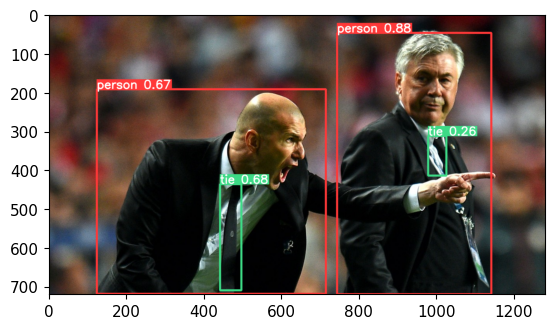

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

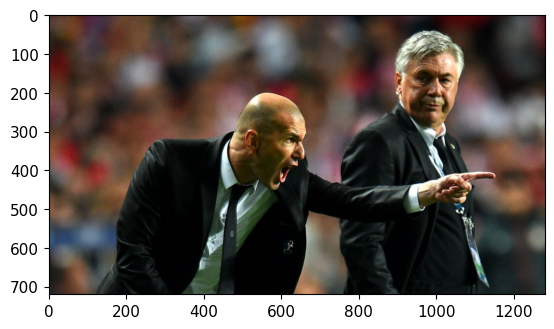

In [11]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# specify the URL of the image you want to load
img_url = 'https://ultralytics.com/images/zidane.jpg'

# download the image from the URL and convert it into a PIL Image object
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# show the image using Matplotlib
plt.imshow(img)
plt.show()

In [88]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
import uuid
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data','images')
labels = ['ThumbsUp','ThumbsDown']
number_imgs = 5
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

In [12]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [13]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/ThumbsUp.2b797278-db50-11ed-a256-66a29d0149d6.jpg


In [14]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data/images/ThumbsUp.2c4da584-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsUp.2c4da728-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsUp.2c4da7d2-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsUp.2c4da872-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsUp.2c4da912-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsDown.2c4da9da-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsDown.2c4daa7a-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsDown.2c4dab1a-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsDown.2c4dabb0-db50-11ed-a256-66a29d0149d6.jpg
data/images/ThumbsDown.2c4dac50-db50-11ed-a256-66a29d0149d6.jpg


In [42]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /Users/rohishksingh/Desktop/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.11.1 torch-2.0.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

      9/499         0G     0.1102    0.01634    0.07452         22        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10    0.00153        0.1    0.00387   0.000879

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     10/499         0G     0.1084    0.01974    0.07466         24        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10    0.00149        0.1    0.00408   0.000962

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     11/499         0G     0.1058    0.01881    0.07103         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10    0.00296        0.2    0.00538    0.00111

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     12/49

     34/499         0G    0.08649    0.02455    0.05609         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10    0.00852        0.9     0.0143     0.0033

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     35/499         0G    0.09012     0.0203    0.05606         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10    0.00852        0.9     0.0143     0.0033

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     36/499         0G    0.08499    0.02334    0.05498         22        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10    0.00845        0.9     0.0246    0.00598

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     37/49

     59/499         0G    0.07142    0.02353    0.03535         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10     0.0368        0.4      0.233     0.0662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     60/499         0G    0.07168    0.03078    0.03516         25        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10     0.0368        0.4      0.233     0.0662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     61/499         0G    0.07812    0.02599     0.0367         25        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10     0.0368        0.4      0.233     0.0662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     62/49

     84/499         0G    0.07815     0.0218    0.02253         25        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.455      0.618        0.6      0.146

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     85/499         0G    0.07244    0.01653     0.0241         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.455      0.618        0.6      0.146

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     86/499         0G    0.07887    0.02167    0.02911         25        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.455      0.618        0.6      0.146

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     87/49

    109/499         0G    0.06445    0.01801    0.01441         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.622        0.7      0.789      0.325

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    110/499         0G     0.0671    0.02227    0.01727         28        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.622        0.7      0.789      0.325

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    111/499         0G    0.06483    0.01802    0.01906         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.862      0.559      0.719      0.183

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    112/49

    134/499         0G    0.06932    0.01725    0.01342         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.379      0.699      0.458      0.142

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    135/499         0G    0.06624    0.01963    0.01324         25        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.432        0.7      0.732      0.261

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    136/499         0G     0.0588    0.01842    0.01445         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.432        0.7      0.732      0.261

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    137/49

    159/499         0G    0.05296    0.01589   0.008416         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10       0.52        0.7      0.771      0.205

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    160/499         0G    0.06593    0.01492    0.01053         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10       0.52        0.7      0.771      0.205

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    161/499         0G     0.0617    0.01755    0.01204         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10       0.52        0.7      0.771      0.205

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    162/49

    184/499         0G    0.05397    0.01757    0.01134         25        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.613      0.694      0.784        0.3

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    185/499         0G     0.0504    0.01571   0.009525         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.613      0.694      0.784        0.3

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    186/499         0G    0.05111    0.01875     0.0106         26        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.613      0.694      0.784        0.3

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    187/49

    209/499         0G    0.04595    0.01839   0.009099         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10       0.49          1      0.808      0.452

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    210/499         0G    0.04841    0.02341   0.008037         31        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10       0.49          1      0.808      0.452

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    211/499         0G    0.05224    0.01585   0.009437         25        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.527      0.982      0.846      0.382

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    212/49

    234/499         0G    0.04924    0.01061   0.007734         16        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10       0.48          1      0.863      0.306

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    235/499         0G    0.04649    0.01074   0.005533         15        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.546          1      0.852      0.305

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    236/499         0G    0.05017    0.01878   0.007551         28        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.546          1      0.852      0.305

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    237/49

    259/499         0G    0.05295    0.01587   0.007919         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.753          1      0.995      0.471

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    260/499         0G      0.049    0.01529   0.007728         26        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.753          1      0.995      0.471

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    261/499         0G    0.04443    0.01427   0.006026         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.753          1      0.995      0.471

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    262/49

    284/499         0G    0.04611    0.01414   0.008671         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.755          1      0.978       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    285/499         0G     0.0472    0.01162    0.00942         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.755          1      0.978       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    286/499         0G    0.04537    0.01182   0.005939         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.755          1      0.978       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    287/49

    309/499         0G    0.04902    0.01387    0.01044         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.733          1      0.995      0.564

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    310/499         0G    0.04677    0.01368   0.008575         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.733          1      0.995      0.564

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    311/499         0G    0.04358   0.009843   0.006542         16        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.947          1      0.995      0.546

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    312/49

    334/499         0G    0.04224    0.01208   0.005372         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.851          1      0.995      0.674

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    335/499         0G    0.03677    0.01667   0.005542         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.961          1      0.995      0.664

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    336/499         0G    0.03705    0.01147   0.005279         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.961          1      0.995      0.664

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    337/49

    359/499         0G    0.03507    0.01297   0.004768         22        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.968          1      0.995      0.585

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    360/499         0G    0.04142    0.01494   0.005321         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.968          1      0.995      0.585

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    361/499         0G    0.03459    0.01438   0.004646         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.968          1      0.995      0.585

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    362/49

    384/499         0G    0.03331    0.01283   0.004954         22        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.963          1      0.995      0.626

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    385/499         0G    0.03707    0.01255   0.005514         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.963          1      0.995      0.626

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    386/499         0G    0.03351    0.01329   0.004612         24        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         10         10      0.963          1      0.995      0.626

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    387/49

Results saved to runs/train/exp6


In [43]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/rohishksingh/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-18 Python-3.10.7 torch-2.0.0 CPU

Fusing layers... 


requirements: /Users/rohishksingh/.cache/torch/hub/requirements.txt not found, check failed.


Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [44]:
img = os.path.join('data', 'images','ThumbsDown.23c37aba-db50-11ed-a256-66a29d0149d6.jpg')

In [45]:
results = model(img)

In [46]:
results.print()

image 1/1: 720x1280 1 ThumbsDown
Speed: 42.6ms pre-process, 88.5ms inference, 15.5ms NMS per image at shape (1, 3, 384, 640)


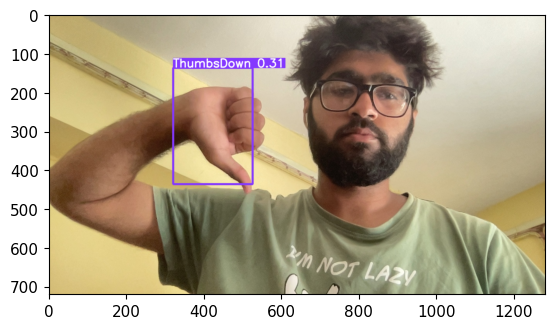

In [47]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [48]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()